# Analyse stock prices

### 1. Get a daily stock price or the return in yahoo/finance. (See Ref. 2)

In [1]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '1990-01-01'
end_date = '2023-04-08'

# Set the ticker
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500
2023-04-05,103.910004,103.910004,100.750000,101.099998,101.099998,45175400
2023-04-06,100.750000,102.379997,99.800003,102.059998,102.059998,43808000


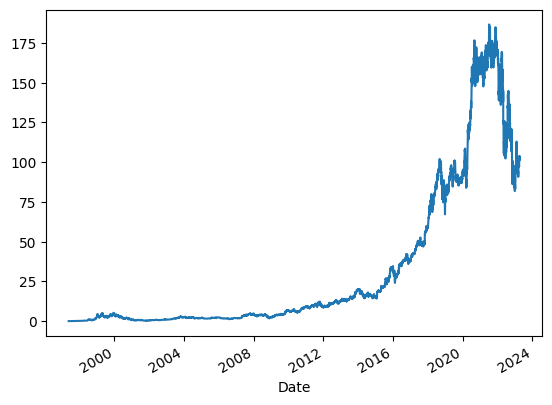

In [2]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

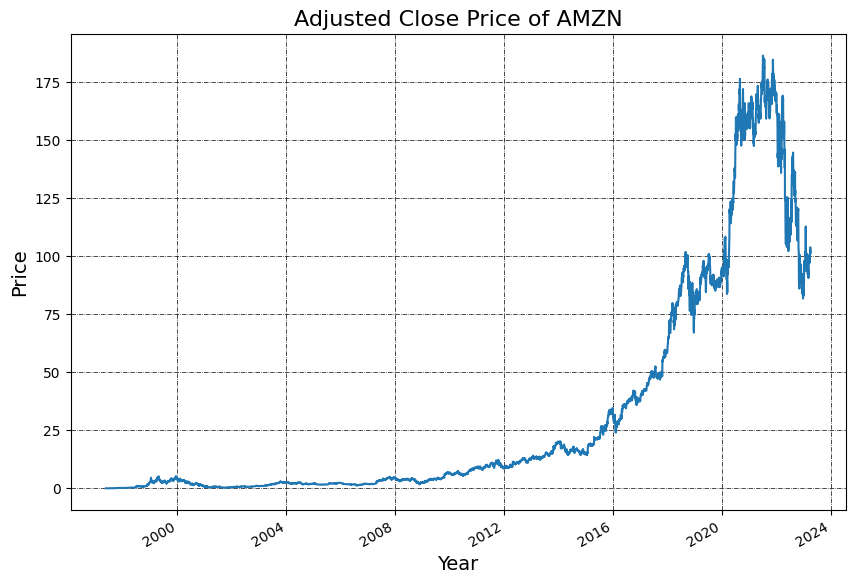

In [3]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

### 2. Calculate and plot the autocorrelation for a stock.

In [4]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Create a new DataFrame
data = data.copy()

# Calculate the daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Calculate the autocorrelation
autocorrelations = [data['Returns'].autocorr(lag=i) for i in range(1, 101)] 

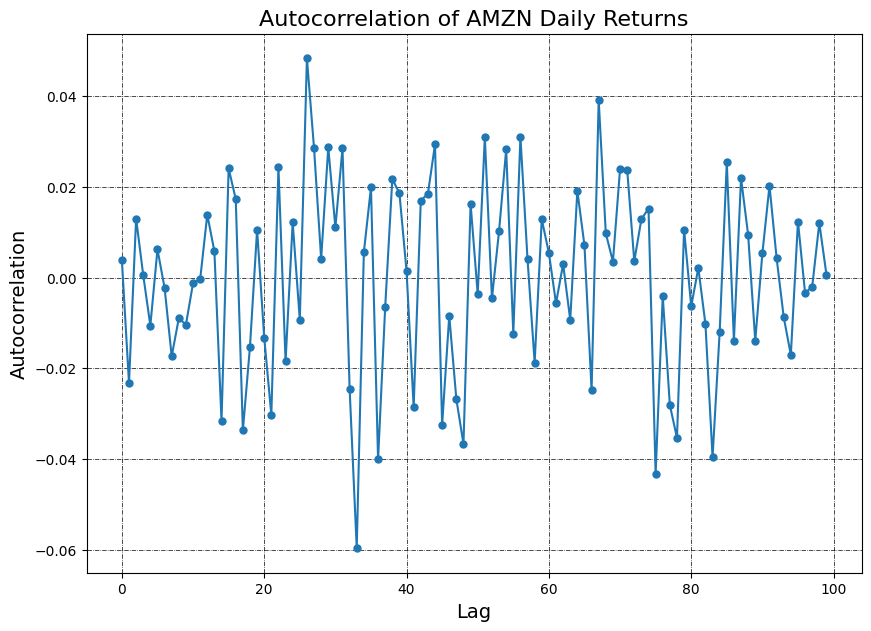

In [5]:
# Plot the autocorrelation
plt.figure(figsize=(10, 7))
plt.plot(autocorrelations, marker='o', linestyle='-', markersize=5)
plt.title("Autocorrelation of %s Daily Returns" % ticker, fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### 3. Get several stock prices. (See Refs)

In [6]:
# Define the ticker list
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Adj Close']
    
# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,MSFT,WMT
Date,,,,
1990-01-02,0.264482,10.509353,0.384520,3.667142
1990-01-03,0.266257,10.603189,0.386687,3.667142
1990-01-04,0.267145,10.723830,0.398060,3.647688
1990-01-05,0.268033,10.697023,0.388312,3.608777
1990-01-08,0.269808,10.764047,0.394269,3.657413


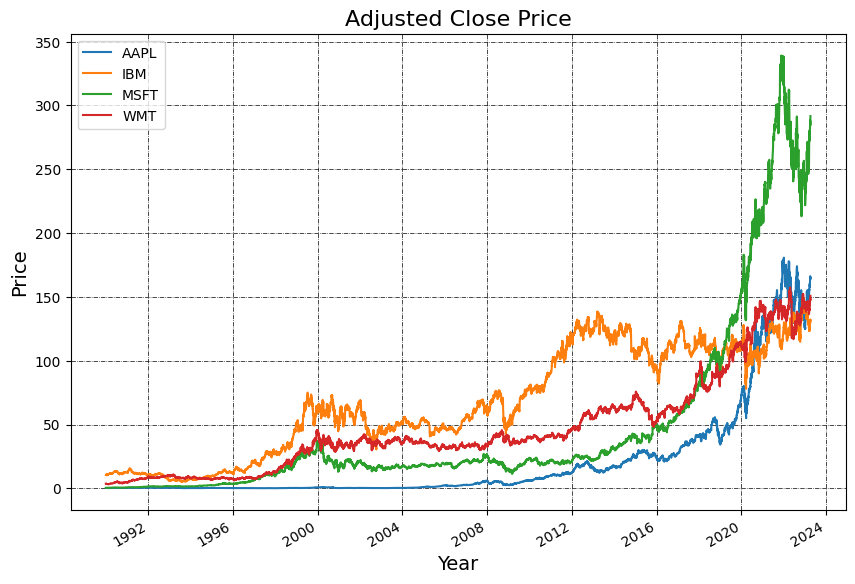

In [7]:
# Plot all the close prices
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### 4. Calculate and plot Pearson correlation coefficients of the price or the return between two stocks

In [8]:
# Import seaborn
import seaborn as sns

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate the correlation coefficients
correlation_matrix = returns.corr()

correlation_matrix

,AAPL,IBM,MSFT,WMT
AAPL,1.000000,0.357829,0.408292,0.239972
IBM,0.357829,1.000000,0.434587,0.294000
MSFT,0.408292,0.434587,1.000000,0.343817
WMT,0.239972,0.294000,0.343817,1.000000


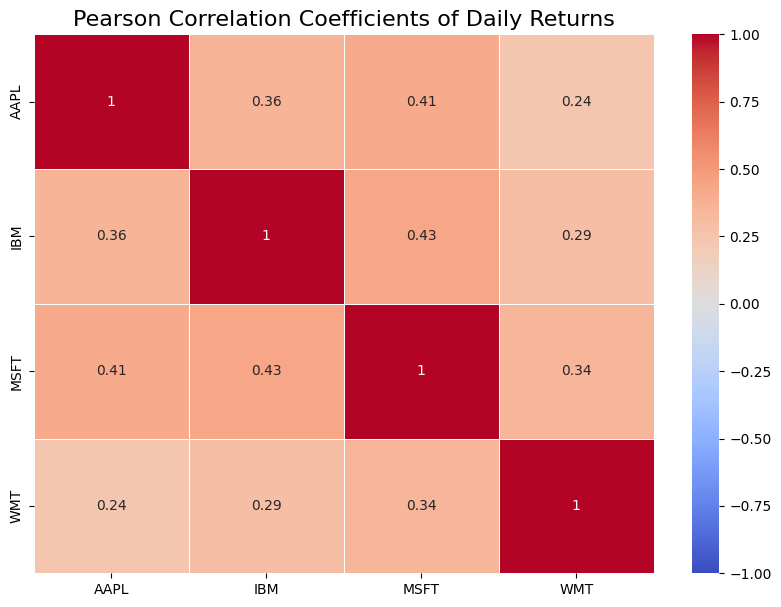

In [9]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Pearson Correlation Coefficients of Daily Returns", fontsize=16)
plt.show()

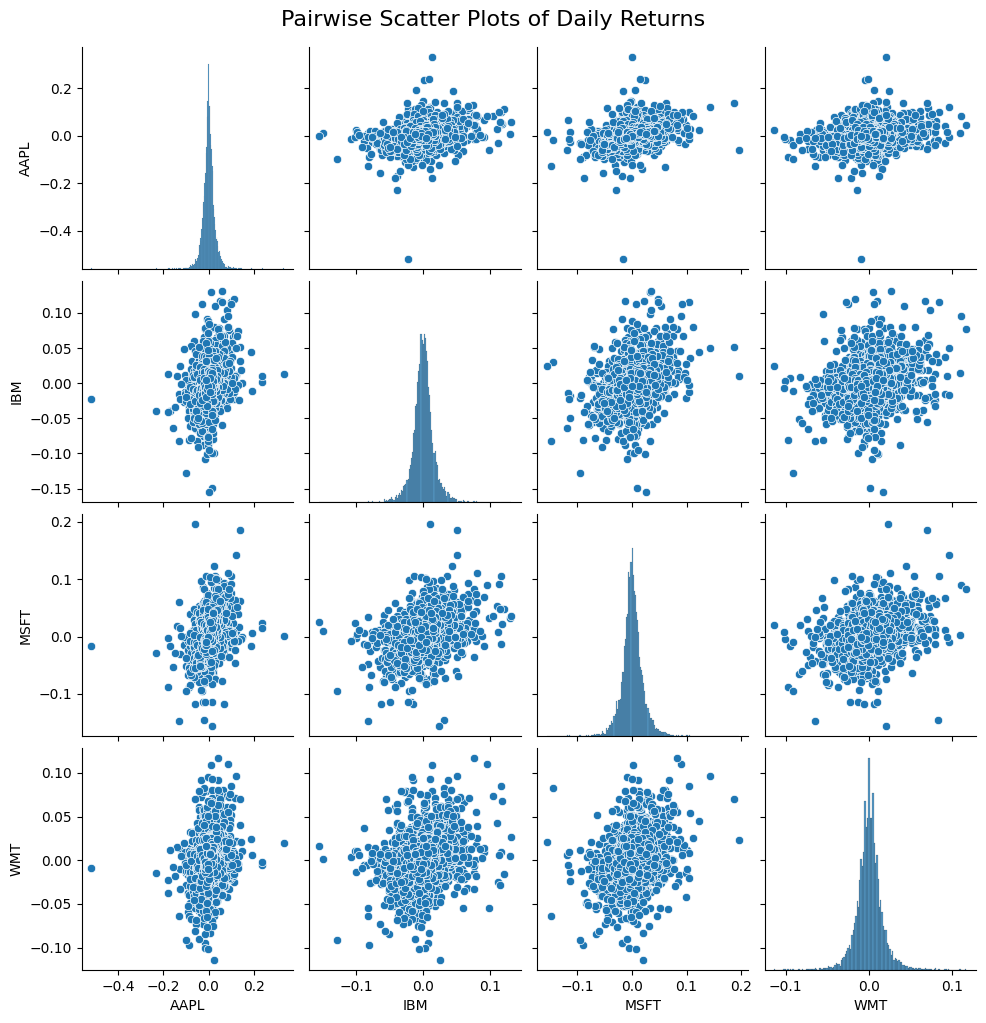

In [10]:
# Plot pairwise scatter plots
sns.pairplot(returns)
plt.suptitle("Pairwise Scatter Plots of Daily Returns", fontsize=16, y=1.02)
plt.show()